In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [5]:
# 1. 데이터 불러오기 및 전처리
df = pd.read_csv(r'C:\Users\CHOI.DESKTOP-R51MDOU\OneDrive - 가천대학교\바탕 화면\Coding\AI Introduction\AAME.csv')
df = df.dropna()
adj_close = df['Adj Close'].values.reshape(-1, 1)

In [6]:
scaler = MinMaxScaler()
adj_close_scaled = scaler.fit_transform(adj_close)

In [7]:
# 2. 시계열 데이터셋 생성 함수
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(len(data) - window_size):
        x.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(x), np.array(y)

In [8]:
window_size = 10
X, y = create_sequences(adj_close_scaled, window_size)

In [9]:
# 3. train/test 분할 (시계열 데이터이므로 shuffle=False)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
# 4. RNN 모델
rnn_model = Sequential([
    SimpleRNN(32, input_shape=(window_size, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)

C:\Users\CHOI.DESKTOP-R51MDOU\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 5. LSTM 모델
lstm_model = Sequential([
    LSTM(32, input_shape=(window_size, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)


In [12]:
# 6. 예측 및 역변환
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

rnn_pred_inv = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


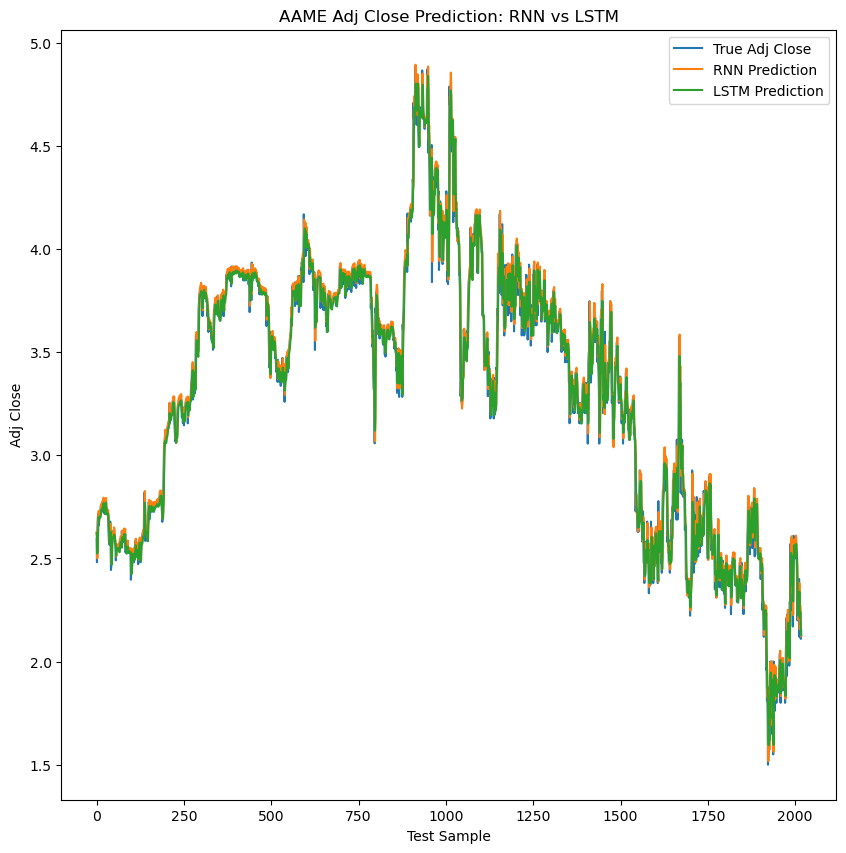

In [17]:
# 7. 결과 시각화
plt.figure(figsize=(10,10))
plt.plot(y_test_inv, label='True Adj Close')
plt.plot(rnn_pred_inv, label='RNN Prediction')
plt.plot(lstm_pred_inv, label='LSTM Prediction')
plt.legend()
plt.title('AAME Adj Close Prediction: RNN vs LSTM')
plt.xlabel('Test Sample')
plt.ylabel('Adj Close')
plt.show()